## Problem Statement:  Build an Analytical model to predict the engine test 
This data is simplified and anonymized version of real automobile engine test data. A leading car manufacturer is designing an automobile engine. It is required by law and regulations, that a given engine configuration is goes through rigorous engine bench test before it is passed for production. Each bench test is an expensive, noisy and time consuming process. Instead the manufacturer would like to use some previous data on various configurations tested and determine through analytics model if their new design will pass or not. This will help them narrow down only few configurations for further testing on physical bench test. Your task is to build that model for them.

### Hypothesis : 
Target variable – Engine test pass or fail
Independent variables that influence the Target variable to be predicted are 
Performance and validation testing
Fuel type
Exhaust gas emissions
Number of Cylinders
Power
Material Grade


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

## Load the data

In [4]:

train = pd.read_csv("C:\\Users\\srita\\Python\\PHD\Train.csv")
test = pd.read_csv("C:\\Users\\srita\\Python\\PHD\Test.csv")


### Check the data

In [5]:
#train.describe
#check the rows, columns
#check the Missing values
#check target class distrbution
#check the data types of the input variables
#check the categorical classes

In [6]:
#train.describe
train.describe()

,ID,Number of Cylinders
count,3156.000000,2998.000000
mean,1578.500000,5.879253
std,911.203051,1.688475
min,1.000000,4.000000
25%,789.750000,4.000000
50%,1578.500000,6.000000
75%,2367.250000,8.000000
max,3156.000000,8.000000


In [7]:
#check the rows and columns
train.count()

ID                             3156
y                              3156
Number of Cylinders            2998
material grade                 2998
Lubrication                    2998
Valve Type                     2998
Bearing Vendor                 2998
Fuel Type                      2998
Compression ratio              2998
cam arrangement                2998
Cylinder arragement            2998
Turbocharger                   2998
Varaible Valve Timing (VVT)    2998
Cylinder deactivation          2998
Direct injection               2998
main bearing type              2998
displacement                   2998
piston type                    2998
Max. Torque                    2998
Peak Power                     2998
Crankshaft Design              2998
Liner Design                   2998
dtype: int64

In [8]:
train.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design '],
      dtype='object')

In [8]:
train.isnull().sum()

ID                               0
y                                0
Number of Cylinders            158
material grade                 158
Lubrication                    158
Valve Type                     158
Bearing Vendor                 158
Fuel Type                      158
Compression ratio              158
cam arrangement                158
Cylinder arragement            158
Turbocharger                   158
Varaible Valve Timing (VVT)    158
Cylinder deactivation          158
Direct injection               158
main bearing type              158
displacement                   158
piston type                    158
Max. Torque                    158
Peak Power                     158
Crankshaft Design              158
Liner Design                   158
dtype: int64

In [9]:
train['y'].value_counts()

pass    1628
fail    1528
Name: y, dtype: int64

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


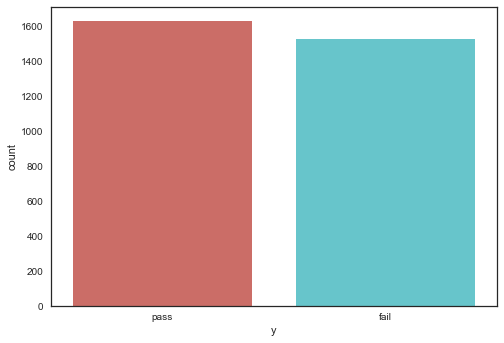

In [10]:
sns.countplot(x='y',data=train,palette='hls')
plt.show()

In [11]:
train.dtypes

ID                               int64
y                               object
Number of Cylinders            float64
material grade                  object
Lubrication                     object
Valve Type                      object
Bearing Vendor                  object
Fuel Type                       object
Compression ratio               object
cam arrangement                 object
Cylinder arragement             object
Turbocharger                    object
Varaible Valve Timing (VVT)     object
Cylinder deactivation           object
Direct injection                object
main bearing type               object
displacement                    object
piston type                     object
Max. Torque                     object
Peak Power                      object
Crankshaft Design               object
Liner Design                    object
dtype: object

In [12]:
train['Number of Cylinders'].value_counts()

4.0    1164
8.0     983
6.0     851
Name: Number of Cylinders, dtype: int64

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


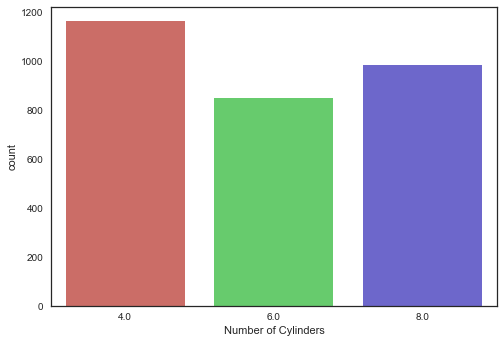

In [13]:
sns.countplot(x='Number of Cylinders',data=train,palette='hls')
plt.show()

In [14]:
train.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design '],
      dtype='object')

### Load Additional data  

In [15]:
df_addl = pd.read_csv("C:\\Users\\srita\\Python\\PHD\Train_AdditionalData.csv")
df_test_addl = pd.read_csv("C:\\Users\\srita\\Python\\PHD\Test_AdditionalData.csv")

#### Additional data contains the Tests A and TestB whcih contains only IDs which Engine has passed the test.
If ID in TestA is not there, Engine ID as in Train data has not passed the Test, 
If ID is present that means Engine has passed. 
Similarly for TestB.
Using this Additional information, cross checking with ID in train data and Additonal data, and Updated the TestA and TestB results as additional column to Train data

In [16]:
df_addl['TestA'] = df_addl['TestA'].fillna(0)
df_addl['TestB'] = df_addl['TestB'].fillna(0)
df_test_addl['TestA'] = df_test_addl['TestA'].fillna(0)
df_test_addl['TestB'] = df_test_addl['TestB'].fillna(0)

In [17]:
def getresult(x,test):
    
    if x in test:
        return 1
    else:
          return 0


In [18]:
ids = list(train['ID'])
testa = list(df_addl['TestA'])
testb = list(df_addl['TestB'])

train['TestA'] = train['ID'].apply(lambda x: getresult(x,testa))
train['TestB'] = train['ID'].apply(lambda x: getresult(x,testb))

In [19]:
test_ids = list(test['ID'])
testA = list(df_test_addl['TestA'])
testB = list(df_test_addl['TestB'])

test['TestA'] = test['ID'].apply(lambda x: getresult(x,testA))
test['TestB'] = test['ID'].apply(lambda x: getresult(x,testB))


In [20]:
print("Test A Results ", train['TestA'].value_counts())
print("Test B Results", train['TestB'].value_counts())


Test A Results  1    2026
0    1130
Name: TestA, dtype: int64
Test B Results 1    2065
0    1091
Name: TestB, dtype: int64


C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


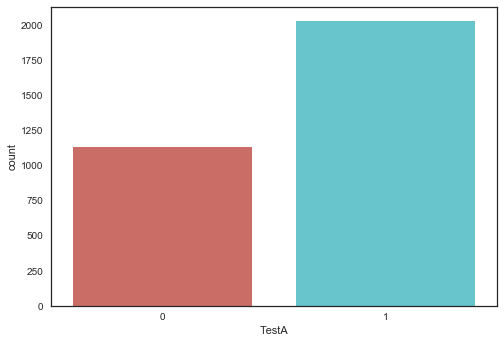

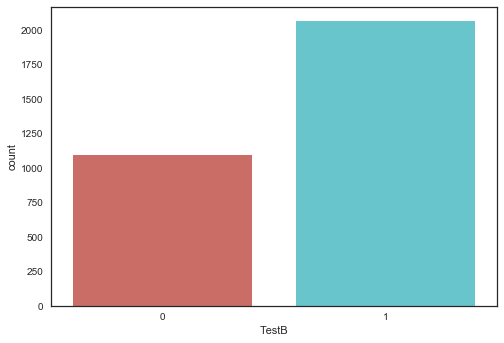

In [21]:
sns.countplot(x='TestA',data=train,palette='hls')
plt.show()
sns.countplot(x='TestB',data=train,palette='hls')
plt.show()

#### Train Test A has 2026 pass and 1130 fail
#### Train Test B has 2065 pass and 1091 fail

In [22]:
test['TestA'].value_counts()

1    699
0    354
Name: TestA, dtype: int64

In [23]:
test.shape

(1053, 23)

In [24]:
train.columns

Index(['ID', 'y', 'Number of Cylinders', 'material grade', 'Lubrication',
       'Valve Type', 'Bearing Vendor', 'Fuel Type', 'Compression ratio',
       'cam arrangement', 'Cylinder arragement', 'Turbocharger',
       'Varaible Valve Timing (VVT)', 'Cylinder deactivation',
       'Direct injection', 'main bearing type', 'displacement', 'piston type',
       'Max. Torque', 'Peak Power', 'Crankshaft Design', 'Liner Design ',
       'TestA', 'TestB'],
      dtype='object')

### Target variable is y. Separating from Train data

In [25]:
y = train['y']
X = train.drop('y',axis=1)

#### Removing the ID column from the train and test data

In [26]:
X = X.drop('ID',axis=1)

In [27]:
X1 = test.drop('ID',axis=1)


In [28]:
print(X.shape)
print(X1.shape)

(3156, 22)
(1053, 22)


In [29]:
print(y.shape)

(3156,)


### Feature Analysis- Visualization

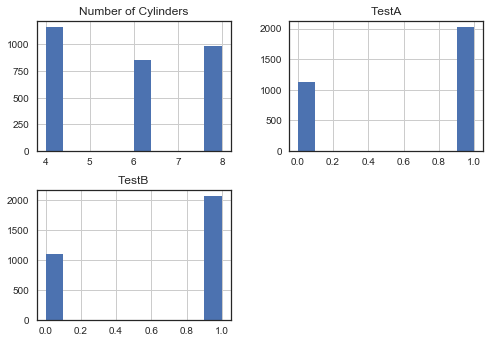

In [31]:
X.hist()
plt.show()

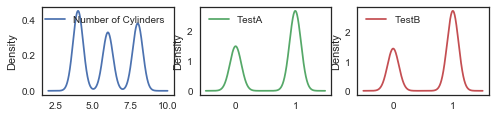

In [32]:
X.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

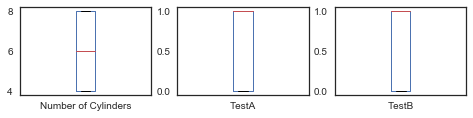

In [33]:
X.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)
plt.show()

In [34]:
names= list(X.columns)


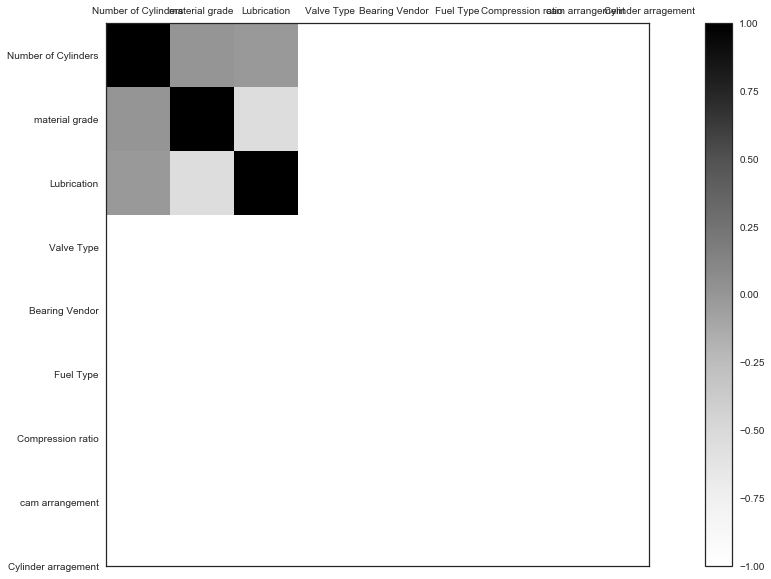

In [36]:
correlations = X.corr()

# plot correlation matrix
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Joining Train and Test data inorder to obtain the same results duing categorical conversion, missing value imputation and data type conversion

In [37]:
dataset =  pd.concat(objs=[X, X1], axis=0).reset_index(drop=True)

In [38]:
cols = dataset.columns
for col in cols:
    dataset[col] = dataset[col].astype('category')

In [41]:
dataset_vis = dataset.copy()

In [42]:
dataset_vis['y'] = y

In [43]:
dataset_vis.columns

Index(['Number of Cylinders', 'material grade', 'Lubrication', 'Valve Type',
       'Bearing Vendor', 'Fuel Type', 'Compression ratio', 'cam arrangement',
       'Cylinder arragement', 'Turbocharger', 'Varaible Valve Timing (VVT)',
       'Cylinder deactivation', 'Direct injection', 'main bearing type',
       'displacement', 'piston type', 'Max. Torque', 'Peak Power',
       'Crankshaft Design', 'Liner Design ', 'TestA', 'TestB', 'y'],
      dtype='object')

## Feature Analysis

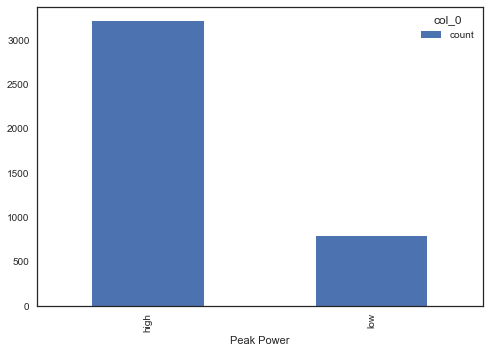

In [50]:
my_tab = pd.crosstab(index = dataset_vis["Peak Power"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

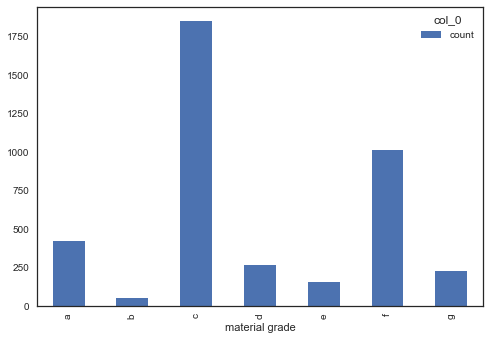

In [52]:
my_tab = pd.crosstab(index = dataset_vis["material grade"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab.plot.bar()

#### Additional data added is alreaded imputed for missing values and also in categorical binary data, so separating from dataset

In [53]:
TestAB = dataset.filter(['TestA','TestB'], axis=1)

In [54]:
dataset_t = dataset.drop(['TestA','TestB'],axis=1)

### Missing value imputation, using ffill method, forward fill, 

In [55]:
dataset_t = dataset_t.fillna(method='ffill')

In [56]:
len(dataset_t.columns)

20

### Converting categorical variables to one hot encoder or dummify the variables 

In [57]:
dataset_vector = pd.get_dummies(dataset_t, prefix=['Num_Cyl1','mat_grade2','Lub3','Valve4','Bearing5','Fuel6','Comp_ratio7','cam8','Cyl_arr9','Turbocharger10','VVT11','Cyl_dec12','Dir_inj13','main_bear14','displ15','piston16','Max_Tor17','Peak18','Crank19','LD20'])

In [58]:
dataset_vector.columns

Index(['Num_Cyl1_4.0', 'Num_Cyl1_6.0', 'Num_Cyl1_8.0', 'mat_grade2_a',
       'mat_grade2_b', 'mat_grade2_c', 'mat_grade2_d', 'mat_grade2_e',
       'mat_grade2_f', 'mat_grade2_g', 'Lub3_L1', 'Lub3_L2', 'Lub3_L3',
       'Lub3_L4', 'Valve4_A', 'Valve4_B', 'Valve4_C', 'Valve4_D',
       'Bearing5_V1', 'Bearing5_V2', 'Bearing5_V3', 'Bearing5_V4',
       'Bearing5_V5', 'Bearing5_V6', 'Fuel6_gasoline', 'Fuel6_petrol',
       'Comp_ratio7_high', 'Comp_ratio7_low', 'cam8_DOHC', 'cam8_SOHC',
       'Cyl_arr9_V', 'Cyl_arr9_inline', 'Turbocharger10_No',
       'Turbocharger10_Yes', 'VVT11_No', 'VVT11_Yes', 'Cyl_dec12_No',
       'Cyl_dec12_Yes', 'Dir_inj13_No', 'Dir_inj13_Yes', 'main_bear14_Journal',
       'main_bear14_Roller', 'displ15_high', 'displ15_low', 'piston16_linear',
       'piston16_rotary', 'Max_Tor17_high', 'Max_Tor17_low', 'Peak18_high',
       'Peak18_low', 'Crank19_CD1', 'Crank19_CD2', 'LD20_LD1', 'LD20_LD2'],
      dtype='object')

### Joining back the TestA and TestB to dataset 

In [59]:
dataset_vector['TestA'] = TestAB['TestA']

In [60]:
dataset_vector['TestB'] = TestAB['TestB']

In [61]:
y.isnull().sum()

0

In [62]:
len(dataset_vector)

4209

In [63]:
n = len(y)
n

3156

In [64]:
X_vector = dataset_vector[:n]
X_test_vector = dataset_vector[n:]

In [65]:
print(X_vector.shape)
print(X_test_vector.shape)

(3156, 56)
(1053, 56)


In [66]:
print(y.shape)

(3156,)


## Modeling

## Logistic Regression Model

In [67]:
y = y.astype("category")


In [68]:
y.dtypes

CategoricalDtype(categories=['fail', 'pass'], ordered=False)

In [69]:
y = y.map({'fail': 0,'pass': 1})

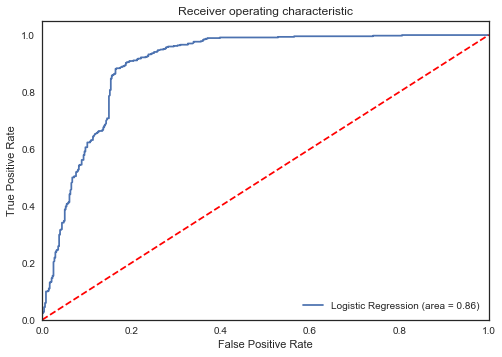

In [71]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
# shuffle and split training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_vector, y, test_size=.3,
                                                    random_state=0)
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
log_preds = lr.predict(X_val)

logit_roc_auc = roc_auc_score(y_val, log_preds)
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
print("Accuracy of logistic regression classifier is {:.2f}".format(lr.score(X_val,y_val)))

Accuracy of logistic regression classifier is 0.86


## Cross Validation on Logistic Regression

In [73]:
kfold=10
results = cross_val_score(lr, X_vector, y, cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.863


## Modelling test on different Algorithms and compare the Results
Tree based Models - Decision Trees, Adaboost, Random Forest, Extra Tree ,
KNN,
SVM

In [74]:
 #Cross validate model with Kfold stratified cross val
kfold = 10
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))




In [75]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_vector, y, scoring = "accuracy", cv = kfold, n_jobs=4))



C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


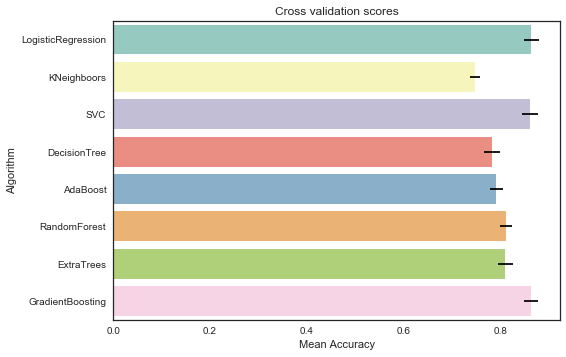

In [76]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","KNeighboors","SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Hyper Tuning parameters with GridSearchCV

In [77]:
RF = RandomForestClassifier()
kfold = StratifiedKFold(n_splits=10)
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


RFC = GridSearchCV(RF,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

RFC.fit(X_vector,y)

RFC_best = RFC.best_estimator_

# Best score
RFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.8min finished


0.85836501901140683

In [78]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_vector,y)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.0s
[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed:   59.9s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:  1.3min remaining:    0.4s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:  1.3min finished


0.78992395437262353

In [79]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_vector,y)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.8min finished


0.85678073510773134

In [80]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_vector,y)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   47.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.6min finished


0.86058301647655255

In [ ]:
#y_submissions = gsGBC.predict(X_test_vector)
#m = y_submissions == 1
#t_submissions = np.where(m,'pass','fail')
#submissions_t = pd.DataFrame({'ID': test['ID'], 'y':t_submissions})
#submissions_t.to_csv("submissions.csv",index=False)

In [81]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_vector,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed: 12.1min finished


0.86311787072243351

In [ ]:
#y_submissions = gsSVMC.predict(X_test_vector)
#m = y_submissions == 1
#t_submissions = np.where(m,'pass','fail')
#submissions_t = pd.DataFrame({'ID': test['ID'], 'y':t_submissions})
#submissions_t.to_csv("submissions.csv",index=False)

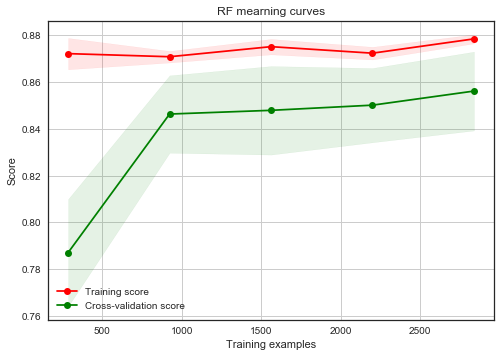

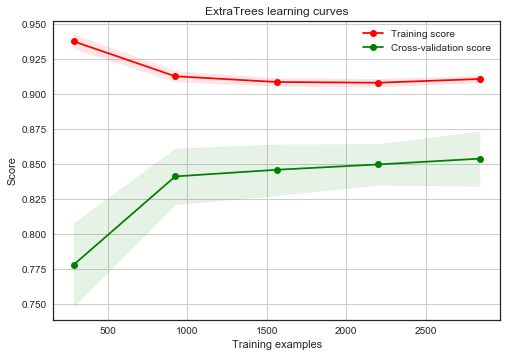

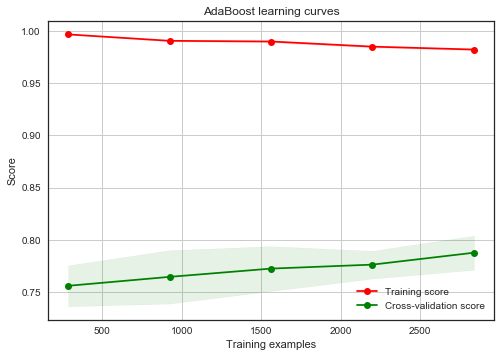

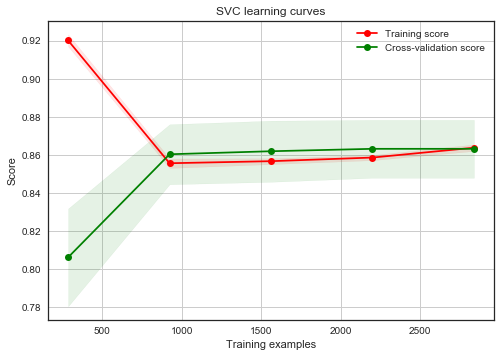

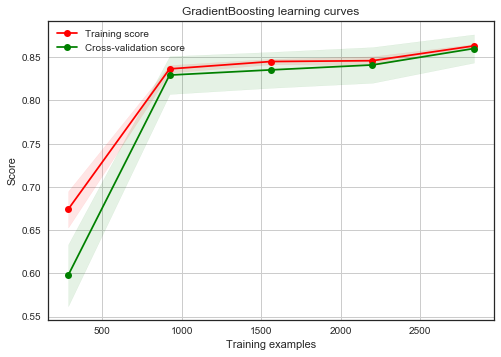

In [82]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(RFC.best_estimator_,"RF mearning curves",X_vector,y,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_vector,y,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_vector,y,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_vector,y,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_vector,y,cv=kfold)

### SVC is better, Training and Cross validation curves are close together and generalise the prediction 
### Gradient Boosting Trees - Cross validation error is growing and tend to over fit the training set
### Adaboost - cross validation error and training error not close and may need more training examples

## Feature importance for Tree Classifiers

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


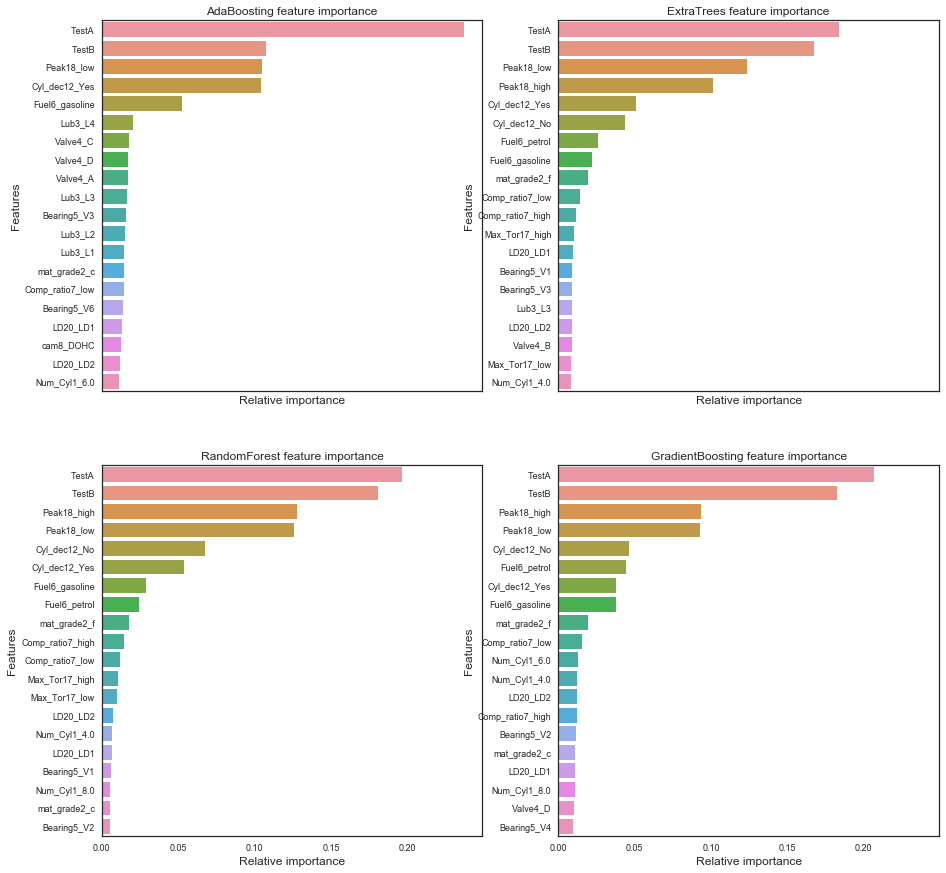

In [83]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_vector.columns[indices][:-20],x = classifier.feature_importances_[indices][:-20] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

#### based on the feature importnace of all the tree classifiers,  except the Ada boost, Top 5 features used by the Random Forest, Gradient Boosting Trees and Extra Tree classifier are Test B,TestA,Peak18,Cyl_dec12,Fuel6
#### Predictions are quite similar for all the classifiers except the Adaboost. There are slight differences. These difference are sufficent to consider an Ensembling vote. 

In [85]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test_vector), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test_vector), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(X_test_vector), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(X_test_vector), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test_vector), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,\
                              test_Survived_GBC, test_Survived_SVMC],axis=1)




## Ensembling Modelling

## Combining Models
I choosed a voting classifier to combine the predictions coming from the 5 classifiers.

I preferred to pass the argument "soft" to the voting parameter to take into account the probability of each vote.

In [86]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_vector, y)

### final result: 87 %

In [ ]:
votingC

In [87]:
clf1 = RFC_best
clf2 = ExtC_best
clf3 = SVMC_best

probas = [c.fit(X_vector, y).predict_proba(X_test_vector) for c in (clf1, clf2, clf3, votingC)]


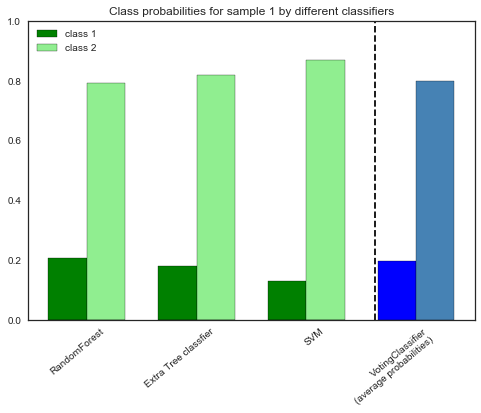

In [110]:
# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['RandomForest',
                    'Extra Tree classfier',
                    'SVM',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()


In [88]:
y_submissions = votingC.predict(X_test_vector)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions.csv",index=False)

In [89]:
dataset_vector.columns

Index(['Num_Cyl1_4.0', 'Num_Cyl1_6.0', 'Num_Cyl1_8.0', 'mat_grade2_a',
       'mat_grade2_b', 'mat_grade2_c', 'mat_grade2_d', 'mat_grade2_e',
       'mat_grade2_f', 'mat_grade2_g', 'Lub3_L1', 'Lub3_L2', 'Lub3_L3',
       'Lub3_L4', 'Valve4_A', 'Valve4_B', 'Valve4_C', 'Valve4_D',
       'Bearing5_V1', 'Bearing5_V2', 'Bearing5_V3', 'Bearing5_V4',
       'Bearing5_V5', 'Bearing5_V6', 'Fuel6_gasoline', 'Fuel6_petrol',
       'Comp_ratio7_high', 'Comp_ratio7_low', 'cam8_DOHC', 'cam8_SOHC',
       'Cyl_arr9_V', 'Cyl_arr9_inline', 'Turbocharger10_No',
       'Turbocharger10_Yes', 'VVT11_No', 'VVT11_Yes', 'Cyl_dec12_No',
       'Cyl_dec12_Yes', 'Dir_inj13_No', 'Dir_inj13_Yes', 'main_bear14_Journal',
       'main_bear14_Roller', 'displ15_high', 'displ15_low', 'piston16_linear',
       'piston16_rotary', 'Max_Tor17_high', 'Max_Tor17_low', 'Peak18_high',
       'Peak18_low', 'Crank19_CD1', 'Crank19_CD2', 'LD20_LD1', 'LD20_LD2',
       'TestA', 'TestB'],
      dtype='object')

In [90]:
dataset.columns

Index(['Number of Cylinders', 'material grade', 'Lubrication', 'Valve Type',
       'Bearing Vendor', 'Fuel Type', 'Compression ratio', 'cam arrangement',
       'Cylinder arragement', 'Turbocharger', 'Varaible Valve Timing (VVT)',
       'Cylinder deactivation', 'Direct injection', 'main bearing type',
       'displacement', 'piston type', 'Max. Torque', 'Peak Power',
       'Crankshaft Design', 'Liner Design ', 'TestA', 'TestB'],
      dtype='object')

In [91]:
new_dataset = dataset.drop(["Crankshaft Design","Direct injection","Varaible Valve Timing (VVT)"],axis=1)

In [92]:
new_dataset.drop('main bearing type',axis=1,inplace=True)

In [93]:
TestAB = dataset.filter(['TestA','TestB'], axis=1)

In [94]:
new_dataset.drop(['TestA','TestB'],axis=1,inplace=True)

In [95]:
dataset_vector = pd.get_dummies(new_dataset, prefix=['Num_Cyl1','mat_grade2','Lub3','Valve4','Bearing5','Fuel6','Comp_ratio7','cam8','Cyl_arr9','Turbocharger10','Cyl_dec11','displ12','piston13','Max_Tor14','Peak15','LD16'])

In [96]:
dataset_vector['TestA'] = TestAB['TestA']
dataset_vector['TestB'] = TestAB['TestB']

In [97]:
X_vector_2 = dataset_vector[:n]
X_test_vector_2 = dataset_vector[n:]

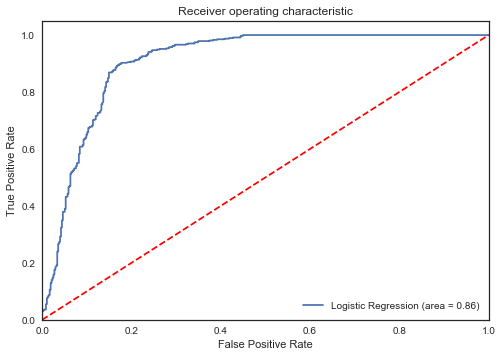

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_vector_2, y, test_size=.3,
                                                    random_state=0)
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
log_preds = lr.predict(X_val)

logit_roc_auc = roc_auc_score(y_val, log_preds)
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [99]:
print("Accuracy of the Logistic Regression after removing some features {:.2f}".format(lr.score(X_val,y_val)))

Accuracy of the Logistic Regression after removing some features 0.86


In [100]:
kfold=10
results = cross_val_score(lr, X_vector_2, y, cv=kfold, scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.867


In [101]:
y_submissions = lr.predict(X_test_vector_2)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions.csv",index=False)

## Result : 0.88%

### Ensemble methods, voting Classifier

In [102]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_vector_2, y)

In [103]:
y_submissions = votingC.predict(X_test_vector_2)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions_voting.csv",index=False)

### Result : 0.87%

In [104]:
new_dataset = dataset[['Number of Cylinders', 'material grade','Bearing Vendor', 'Fuel Type','Cylinder deactivation','Peak Power',
        'TestA', 'TestB']]

In [105]:
new_dataset.head()

,Number of Cylinders,material grade,Bearing Vendor,Fuel Type,Cylinder deactivation,Peak Power,TestA,TestB
0,6.0,a,V4,gasoline,No,high,1,1
1,6.0,b,V3,gasoline,No,high,1,0
2,4.0,NaN,V2,gasoline,Yes,high,1,1
3,4.0,f,NaN,gasoline,Yes,high,1,1
4,8.0,d,V2,gasoline,No,high,0,1


In [106]:
len(new_dataset)

4209

In [107]:
TestAB = new_dataset.filter(['TestA','TestB'], axis=1)

In [108]:
new_dataset.drop(['TestA','TestB'],axis=1,inplace=True)

C:\Users\srita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
new_dataset = new_dataset.fillna(method='ffill')

In [110]:
new_dataset.head()

,Number of Cylinders,material grade,Bearing Vendor,Fuel Type,Cylinder deactivation,Peak Power
0,6.0,a,V4,gasoline,No,high
1,6.0,b,V3,gasoline,No,high
2,4.0,b,V2,gasoline,Yes,high
3,4.0,f,V2,gasoline,Yes,high
4,8.0,d,V2,gasoline,No,high


In [111]:
new_dataset_vector =pd.get_dummies(new_dataset,prefix=['Number of Cylinders', 'material grade','Bearing Vendor', 'Fuel Type','Cylinder deactivation','Peak Power'])

In [112]:
new_dataset_vector['TestA'] = TestAB['TestA']
new_dataset_vector['TestB'] = TestAB['TestB']

In [113]:
X_vector = new_dataset_vector[:n]
X_test_vector = new_dataset_vector[n:]

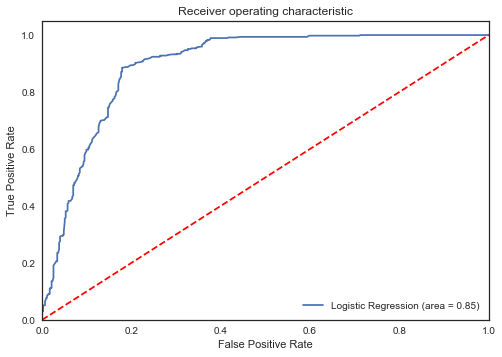

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_vector, y, test_size=.3,
                                                    random_state=0)
lr = LogisticRegression(random_state = 0)
lr.fit(X_train,y_train)
log_preds = lr.predict(X_val)

logit_roc_auc = roc_auc_score(y_val, log_preds)
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [115]:
print("Accuracy after feature engineering {:.2f}".format(lr.score(X_val,y_val)))

Accuracy after feature engineering 0.85


In [116]:
y_submissions = lr.predict(X_test_vector)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions_lr.csv",index=False)

In [117]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_vector, y)

In [118]:
y_submissions = votingC.predict(X_test_vector)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions_vc_2.csv",index=False)

In [119]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_vector,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed: 10.4min finished


0.85994930291508243

In [121]:
y_submissions = gsSVMC.predict(X_test_vector)
m = y_submissions == 1
test_submissions = np.where(m,'pass','fail')
submissions_t = pd.DataFrame({'ID': test['ID'], 'y':test_submissions})
submissions_t.to_csv("submissions_svm_2.csv",index=False)